# Plotting Data:
Plotting data is one of the most important and practical advantages to coding. It is important to learn different ways to plot and learn about all the features that are available and how to use said features

## Matplot:

Matplot is a simple graphing package for Python, that is great for making simple graphs.
In this tutorial we will go over basic Bar graphs and line graphs with some small features.

Before we begin we want to specify inline so we will embed a picture into our notebook so we have an imbeded visualization result image in our notebook.

In [1]:
%matplotlib inline

Matplotlib like numpy tries to help support matlab users transition into using python by providing a library that supports matlab
like constructs in python. For Matplotlib this is done in the matplotlib.pyplot library. The pyplot library is used extensively
throughout many matplotlib programs and will probably be the main library you will work in with matplotlib.

Lets import the matplotlib.pyplot and explore some of its features.

In [2]:
import matplotlib.pyplot as plt

Before we can continue talking about matplotlib.pyplot we first need to talk about the main structure of matplotlib figures and axes

### Figures and Axes

Figures are the main container of matplotlib visualization. These large objects contains 1 or more axes that store each a specific visualization you wish to perform (histogram, bar graph, line graph, etc.). At its core matplotlib uses figures and axes to show all of it's visualization tasks.

Execute the following example to show how figures and axes work.

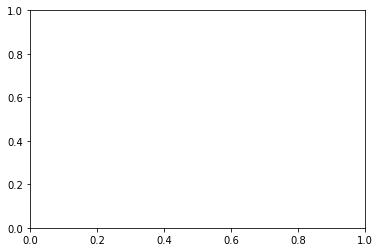

In [3]:
fig = plt.figure()
ax = fig.add_subplot()

Now lets see by what we mean by multiple axes in the same figure. You don't need to understand what add_subplot dose other then it adds a new axes to the same figure

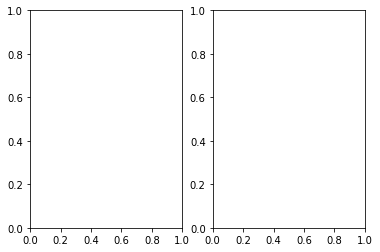

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

From the prior code see a figure with an empty axes. A key part of matplotlib will be calling functions on axes to fill them with visualizations we want to see. However it is a pain to create figures and axes only then to perform the intresting visualization on the axes. To make it faster we use plt directly.

Instead of having to create figures and axes we can call ploting functions directly in plt and they can automatically create figures and axes and build the visualization in the figures for you without having to create figures and axes. While convinent this reduces the flexibility over explicitly creating figures and axes, but for the most part it will not matter too much.

To show what we mean we will create a histogram in the axes to show the difference between explicitly working with axes and using plt directly

In [5]:
x = [0,0,0, 1, 1, 1,1, 1, 2, 2]

##### Explicity creating axes

done


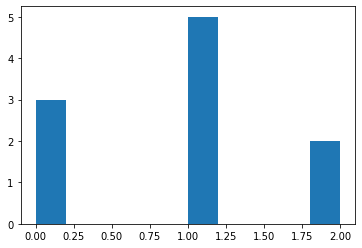

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(x, 10)
print("done")


##### Directly calling plt

done


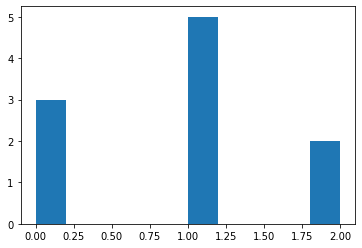

In [7]:
plt.hist(x, 10)
print("done")

We can see how much shorter the code is to write directly using plt.

Now we can finally introduce what are some of the plotting functionality that we can introduce into our axes.

### Histograms:

Histograms takes a sequence of some information (numbers, strings, etc.) and in theory they count how many occurances of each unique entry are in the sequence and plot bars for each unique entry and how frequently they occur.

(array([5., 0., 0., 0., 0., 2., 0., 0., 0., 2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

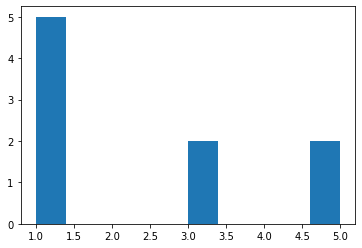

In [8]:
data = [1, 3, 5, 5, 3, 1, 1, 1, 1]
plt.hist(data)

We can see that they plot bars at x position 1, 3, and 5 since those are the 3 unique values in our sequence.

Histograms are not only limited to numeric information

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

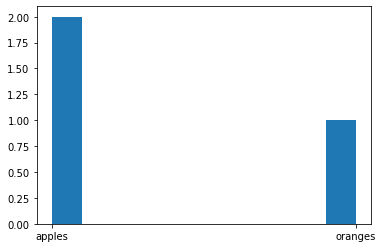

In [9]:
data = ["apples", "apples", "oranges"]
plt.hist(data)

Or even mixed data

(array([2., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

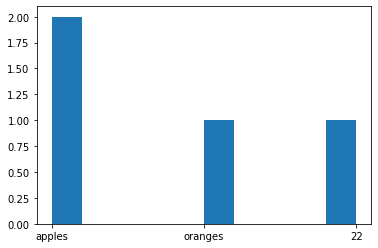

In [10]:
data = ["apples", "apples", "oranges", 22]
plt.hist(data)

We mentioned in theory histograms give a bar to each unique value in your sequence however this may undesirable. Consider a dataset where all entries are all unique but there are several group of entries that each have values within 0.1 of eachother but not exactly. If we give every unique entry a bar we will see all bars of equal height of 1 for 1 occurance but really we want groups for each similar data. So histograms divide the data into some fixed numebr of groups and count occurances in each group. So similar placed value are in the same group. 

done


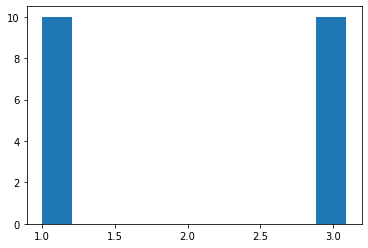

In [11]:
import numpy as np

shift = np.array(list(range(10)))/100.0

x1 = np.array([1 for i in range(10)]) + shift
x3 = np.array([3 for i in range(10)]) + shift

data = np.concatenate([x1, x3])

plt.hist(data)
print("done")

### Intresting detour on return values

As an intresting side note, what about mixed data how dose it group it.

done


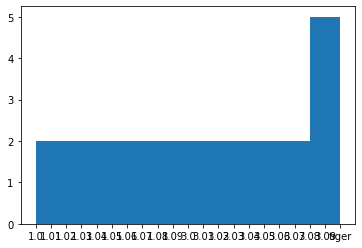

In [12]:
shift = np.array(list(range(10)))/100.0

x1 = np.array([1 for i in range(10)]) + shift
x3 = np.array([3 for i in range(10)]) + shift

animals = np.array(["tiger", "tiger", "tiger"])

data = np.concatenate([x1, x3, animals])

plt.hist(data)
print("done")

It seems to have killed our graph. It would be great if we could see what exactly is in each bar.

We are going to show what histogram function returns. 

First note that histogram by default always breaks data into 10 groups, sometime as in prior examples it it will leave those groups with 0 entries but it will always break into 10 groups.

Histogram gives 3 returns

counts - a list for the number of occurances found in each bar of the histogram

bins - the list of numeric cutoff for the smallest value that is allowed in each bin

patches - a list of patch objects representing each bin.

We will talk a bit about each later, but first lets see each

[2. 2. 2. 2. 2. 2. 2. 2. 2. 5.]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
<a list of 10 Patch objects>


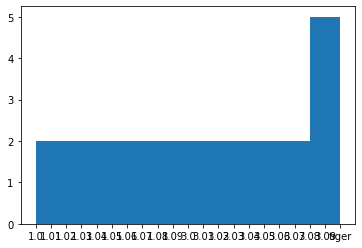

In [13]:
shift = np.array(list(range(10)))/100.0

x1 = np.array([1 for i in range(10)]) + shift
x3 = np.array([3 for i in range(10)]) + shift

animals = np.array(["tiger", "tiger", "tiger"])

data = np.concatenate([x1, x3, animals])

counts, bins, patches = plt.hist(data)

print(counts)
print(bins)
print(patches)

First off patches contain patch class objects so it is not directly obvious and we will need to consult the api to use them further. But we can see in counts that we split the data evenly with 2 entries each in 9 bins and 5 in the last. Additionally from bins we see each bar groups entries within a range of 2 (strange dose "tiger" have a numeric value to fit in one of the bins).

This little detour was to give a deeper understanding that matplotlib plotting functions have return values that can 
help you to inspect how the data was plotted. However in general it is outside the scope of the course and we will only be showing it for the histogram as an example, if you want to learn more on your own you should explore the matplotlib api.

## Quick Note: Jupyter is visual python is not

If you ever use matplotlib in python outside of jupyter and you ran any of the earlier code in python alone you will see no plots. This is because jupyter automatically shows the plot on screen when it finishes running the cell. In python it just draws the data on the object but will not display it unless you explicitly tell it to.

In python you use "plt.show()" to show all the figures. (and jupyter implicity calls plt.show() onto the screen after the cell is done running)

###### Why 10 bins

Histogram defaults to 10 bins but we can change that via the bin paramter in plt.hist

First using the default bins, we get only 10 bars (2 entries per bar) despite there being far more than 10 entries

done


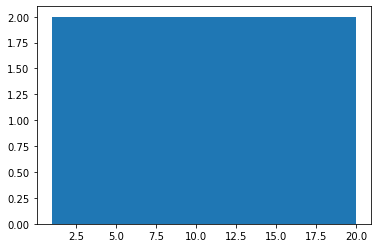

In [14]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.hist(x)
print("done")

Now changing the bins paramter to 20 we get 20 bars so we see 1 entry in each bar

done


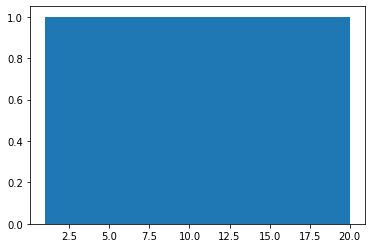

In [15]:
plt.hist(x, bins=20)
print("done")

###### multiple plots

One way to show multiple histograms overlayed is sending mulitdimensional data. plt.hist supports 2-D matricies as well as arrays for it's data input. Given multiple dimensions it will overlay a seperate histogram for each row in the 2-D matrix onto the same histogram plot.

/home/singhj/anaconda3/envs/comp205/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


done


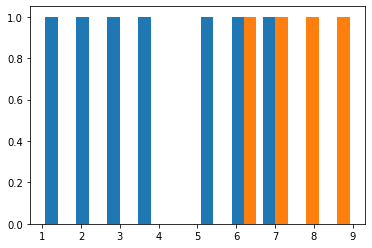

In [16]:
x1 = [1,2,3,4,5,6,7]
x2 = [6,7,8,9]

plt.hist([x1,x2])
print("done")

We see each plot is marked in a different color to differentiate it.

###### What about custom colors

we can set a color parameter by the c parameter in our plt.hist function. c parameter expects a sequence of colors representing the how you want to rolor each row of the 2-D matrix. Color values are specified using string of their color names ('red', 'blue') or by rgb tuple values each specified (0-1).

The full possiblity of color assignments are as follows

| type  | example | 
|-------|---------|
| color name | "red" |
| single letter abreviation |  'r'  |
| grayscale value (0-1)  | 0.5 | 
| RGB hex code  | #FF0000 | 
| RGB tuple (0-1 each) | (1, 0, 0) | 
| html color name| 'firebrick' |

All colors in the table given produce red except grayscale (and arguably firebrick).

/home/singhj/anaconda3/envs/comp205/lib/python3.7/site-packages/matplotlib/colors.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


done


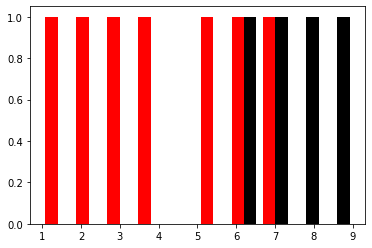

In [17]:
x1 = [1,2,3,4,5,6,7]
x2 = [6,7,8,9]

red = "red"
black = (0,0,0)

plt.hist([x1,x2], color = [red, black])
print("done")

Lets see an intresting example, we have this picture of a square which contains the lightness value of each pixel from (0-255). Our image is arranged as a 2-D matrix with lightness value at each cell corresponding to that pixel. In our image every pixel is either 0 or 255. We want to create a histogram of the lightness of each pixel in our image.

First lets create and show the image

done


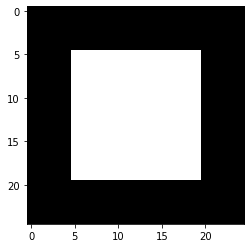

In [18]:
img = np.zeros((25,25))
img[5:-5, 5:-5] = 255

plt.imshow(img, cmap='gray')
print("done")

Now lets use our histogram function on it to get all the pixel intensity values

done


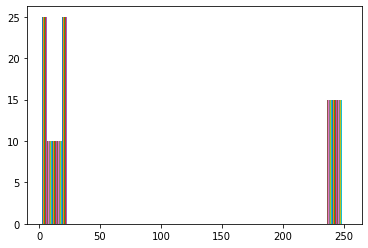

In [19]:
plt.hist(img)
print("done")

It seems to created a bunch of colors in our plot. This is because our image is 2-D so histogram found a histogram for each row of the image and created a seperate color for each. So we need to flatten our image before we pass to the histogram to see it.

done


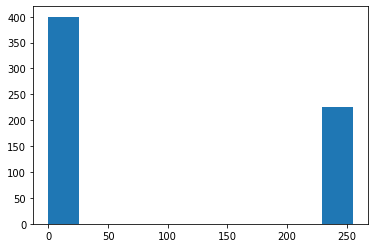

In [20]:
plt.hist(img.flatten())
print("done")

### Line Plots

We use line plots to plot an ordered sequence of points and plots them on a plot and then connect lines between each consecutive pairs of points in the plot. 

we use plt.plot to create line plots and specify 1 array of x coordinates and 1 array of y coordinates

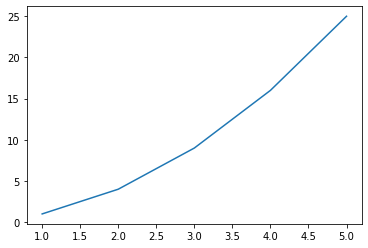

In [21]:
x = np.array([1,2,3,4,5])
y = x**2

plt.plot(x,y)

So we can see at a line connecting each pair of consecutive x,y points in our plot of the function \\((y = x^2 \\)). What dose it mean by ordered set of points what if we change up the order?

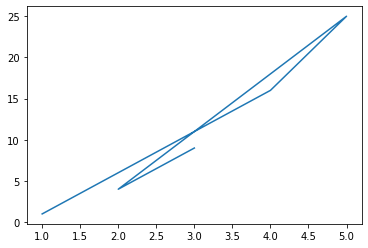

In [22]:
x = np.array([3,2,5,4,1])
y = x**2

plt.plot(x,y)

The x or y positions don't really matter what matters is the order that they are given to function and this effects how the plot can be created so be warned.

To handle multiple plots we can send in 2D matricies for the x coord and y coord. Instead of a seperate data in each row of the matrix we need to specify seperate data along each column

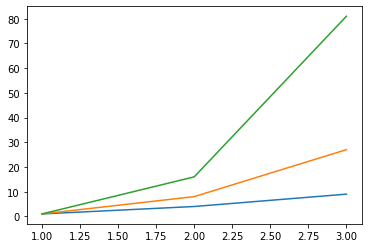

In [23]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

x = np.array([x1,x2,x3]).T # columns of x1, x2, x3

y1 = x1**2
y2 = x2**3
y3 = x3**4

y = np.array([y1,y2,y3]).T # columns of y1,y2,y3

plt.plot(x,y)

Plots can also be given different styles or line type to each line. This is provided by the linestyle parameter. 

Linestyle values can specify from among several possible values as follows:


| short hand | full name |
-------------|------------
|   -     |   solid      |
|   --    |   dashed     |
|   -.    |   dashdot    |
|   :     |   dotted     |

We can use either column as the value for a different style, we can show it as follows

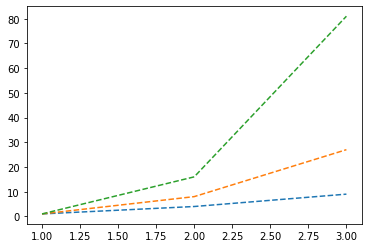

In [24]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

x = np.array([x1,x2,x3]).T # columns of x1, x2, x3

y1 = x1**2
y2 = x2**3
y3 = x3**4

y = np.array([y1,y2,y3]).T # columns of y1,y2,y3

plt.plot(x,y, linestyle="--")

We can also combine color and style togthor into a short string parameter that specifies both. We take the 1 letter color representation as the first character join the character(s). See the example.

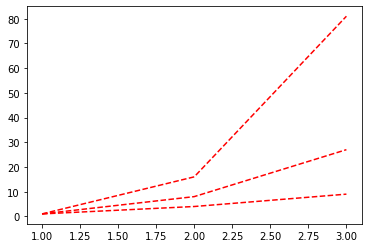

In [25]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4


plt.plot(x,y, "r--")

Up until now we have been passing multi-dimensional data to draw multiple data sets on the same plot by drawing all of them at once using a single plot function. However we can actually stack multiple plot functions togethor. We achieve this by successively calling plotting functions on the same axes.

In our case we successively call using plt method directly so the hidden axes will get successively drawn over to show multiple plots at once.

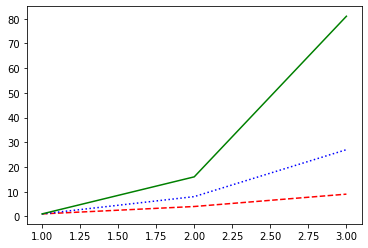

In [26]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4


plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
plt.plot(x3,y3, "g-")

#### Axes Limit

Axes can change the smallest and largest value on the x-axis and y-axis of the axes showing the plot.

We can do this using xlim() and ylim() functions. They each specify 2 parameters for min and max values on the axis that is visible in the axes.

As a side note this also explains the naming of axes, since all plots have axes. If you might have noticed from our earlier imshow call to show the image of a square even plotted images have x and y ticks or axis on the plot.

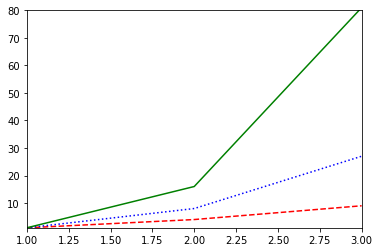

In [27]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4


plt.xlim(1, 3)
plt.ylim(1,80)

plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
plt.plot(x3,y3, "g-")

Compared to the plotting function without any limits on the axes

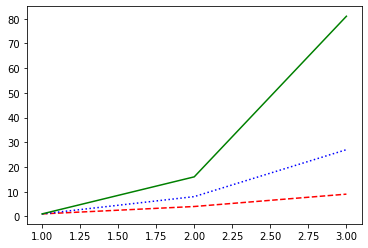

In [28]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4

plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
plt.plot(x3,y3, "g-")

We can also use axis() functions. One use of axis function takes a single list as [xmin, xmax, ymin, ymax] and can automatically put limits on the axis without seperate xlim and ylim calls.

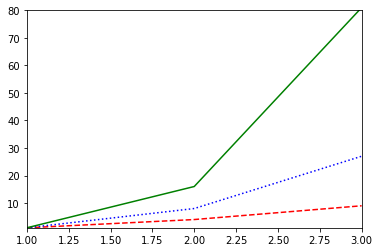

In [29]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4


plt.axis([1,3,1,80])

plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
plt.plot(x3,y3, "g-")

We can also specify to matplotlib to automatically pick the axis bounds for the axes using an alternative use of the axis function. Instead we can specify the string 'tight' to automatically find tight bounds for axes.

(0.9, 3.1, -3.0, 85.0)

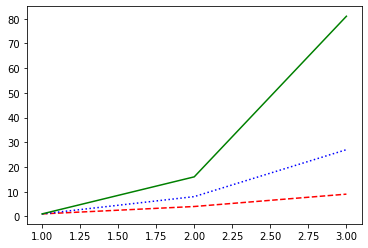

In [30]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4




plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
plt.plot(x3,y3, "g-")

plt.axis('tight')

However since we are calculating bounds at the time it was called, we need to call plot to specify the data points first before it can calculate the best bounds. So calling plt.axis('tight') before plot will fail to produce good bounds. In fact we see nothing, this is beacuse it generates a tight bound on no data so it creates very tiny bounded area where none of the plot lines go through

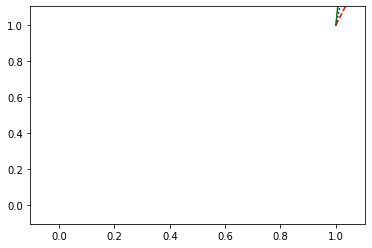

In [31]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4

plt.axis('tight')


plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
plt.plot(x3,y3, "g-")

Alternatively we can use plt.axis('equal') so that the axis have equal lengths on x and y axis. Agian make sure to specify axis after plotting.

(0.9, 3.1, -3.0, 85.0)

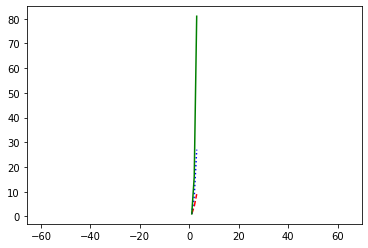

In [32]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4

plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
plt.plot(x3,y3, "g-")

plt.axis('equal')

###### title and x axis and y axis

we can also specify functions for generateing x-axis, y-axis, and title for plots using plt.xlabel, plt.ylabel, and plt.title. Each take string parameter for the value.

Text(0, 0.5, 'Y LABEL HERE')

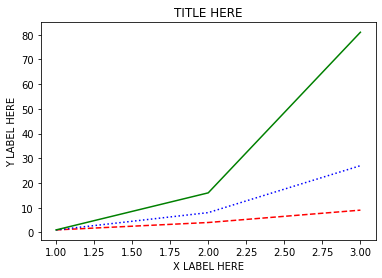

In [33]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4

plt.plot(x1,y1, "r--")
plt.plot(x2,y2, "b:")
plt.plot(x3,y3, "g-")

plt.axis('tight')

plt.title("TITLE HERE")
plt.xlabel("X LABEL HERE")
plt.ylabel("Y LABEL HERE")

#### Legends

Using multiple plots it can be difficult for reader to differntiate so we can create a key or legend to specify each plot.

We first need to name each plot and we can give each plot a parameter "label" that specifies a string name for that plot, this name will appear in the legend. Then we can use the plt.legend() to create our legend on the plot

Text(0, 0.5, 'Y LABEL HERE')

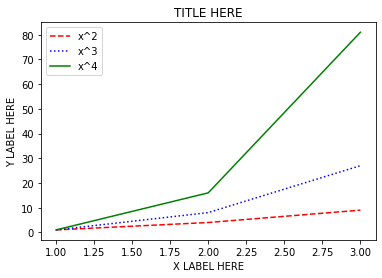

In [34]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
x3 = np.array([1,2,3])

y1 = x1**2
y2 = x2**3
y3 = x3**4

plt.plot(x1,y1, "r--", label='x^2')
plt.plot(x2,y2, "b:", label='x^3')
plt.plot(x3,y3, "g-", label='x^4')

plt.axis('tight')
plt.legend()

plt.title("TITLE HERE")
plt.xlabel("X LABEL HERE")
plt.ylabel("Y LABEL HERE")



#### Universality of methods

One very cool thing about matplotlib is many of these methods can be applied to other plotting functions and additionally all plt functions can also be used via the axes method and called by axes as well.

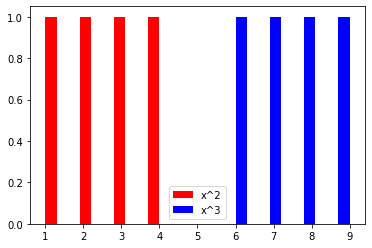

In [35]:
fig = plt.figure()
ax = fig.add_subplot()

x1 = [1,2,3,4]
x2 = [6,7,8,9]

ax.hist(x1, color="r", label='x^2')
ax.hist(x2, color="b", label='x^3')

plt.legend()


In this example we can see the same methods of legends are applicable in histograms and methods that plt uses axes can also use. However there are some caveats:

Several plt method names are slightly different in axes which goes as follows


| plt method   | axes method  |
|--------------|--------------|
| plt.xlabel() | ax.set_xlabel() |
| plt.ylabel() | ax.set_ylabel() |
| plt.xlim()   | ax.set_xlim() |
| plt.ylim()   | ax.set_ylim() |
| plt.title()  | ax.set_title() |

One last intresting thing is that since a single axes can all multiple plotting functions and they will all be overlayed ontop each other they can also be different types of plots all togethor.

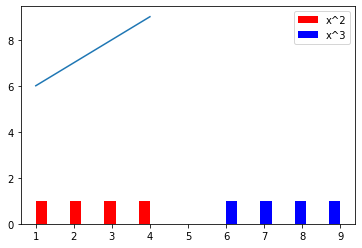

In [36]:
fig = plt.figure()
ax = fig.add_subplot()

x1 = [1,2,3,4]
x2 = [6,7,8,9]

ax.hist(x1, color="r", label='x^2')
ax.hist(x2, color="b", label='x^3')
ax.plot(x1, x2)

plt.legend()


However all plots will try to share the same axis so it may cause some problems if the plots are not related but often in its use it is good to show them when they are related

As a cool example we can show a line plot on an image plot axes

done


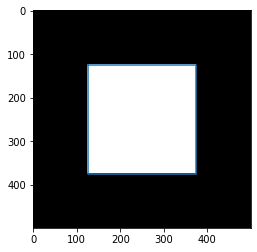

In [37]:
img = np.zeros((500, 500))
img[125:-125, 125:-125] = 255

x = [125, 375, 375, 125, 125]
y = [125, 125, 375, 375, 125]

plt.imshow(img, cmap='gray')
plt.plot(x,y)
print("done")